In [8]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing DataSet
df = pd.read_csv("Churn_Modelling.csv")

In [9]:
#Declaring independend and dependend features
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [11]:
#create dummies
geography = pd.get_dummies(x["Geography"],drop_first = True)
gender = pd.get_dummies(x["Gender"],drop_first = True)

In [17]:
x = pd.concat([x,geography,gender],axis = 1)

In [21]:
x.drop(["Geography","Gender"],axis = 1,inplace = True)

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [22]:
### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [25]:
#####


In [26]:
##### ANN Libraries

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [31]:
###Initilazing ANN
classifier = Sequential()

In [36]:
### Adding Input Layer
classifier.add(Dense(units = 6 , kernel_initializer = 'he_uniform',activation='relu',input_dim =11))

In [37]:
### Adding Hidden Layer
classifier.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation = 'relu'))

In [38]:
###Output Layer
classifier.add(Dense(units=1,kernel_initializer = 'glorot_uniform',activation='sigmoid'))

In [44]:
### Compiler
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics =['accuracy'] )


In [45]:
##Fitting ANN to the training set
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size = 10,epochs = 100)

Epoch 1/100
536/536 [==============================] - 7s 2ms/step - loss: 9294.7346 - accuracy: 0.7459 - val_loss: 2239.8579 - val_accuracy: 0.6357
Epoch 2/100
536/536 [==============================] - 0s 922us/step - loss: 1533.8518 - accuracy: 0.5990 - val_loss: 748.0172 - val_accuracy: 0.5165
Epoch 3/100
536/536 [==============================] - 0s 919us/step - loss: 549.1531 - accuracy: 0.5255 - val_loss: 225.5012 - val_accuracy: 0.7637
Epoch 4/100
536/536 [==============================] - 1s 936us/step - loss: 144.8856 - accuracy: 0.7609 - val_loss: 27.7878 - val_accuracy: 0.6619
Epoch 5/100
536/536 [==============================] - 1s 969us/step - loss: 21.2607 - accuracy: 0.6937 - val_loss: 11.0011 - val_accuracy: 0.6660
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 7.2754 - accuracy: 0.7378 - val_loss: 8.2427 - val_accuracy: 0.7902
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 5.5517 - accuracy: 0.7533 - val_loss: 6

536/536 [==============================] - 1s 995us/step - loss: 1.9097 - accuracy: 0.7638 - val_loss: 0.5655 - val_accuracy: 0.7929
Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 1.1402 - accuracy: 0.7759 - val_loss: 2.2300 - val_accuracy: 0.7955
Epoch 59/100
536/536 [==============================] - 1s 953us/step - loss: 1.4756 - accuracy: 0.7608 - val_loss: 0.8523 - val_accuracy: 0.7959
Epoch 60/100
536/536 [==============================] - 1s 973us/step - loss: 0.9265 - accuracy: 0.7763 - val_loss: 1.6226 - val_accuracy: 0.7959
Epoch 61/100
536/536 [==============================] - 1s 941us/step - loss: 1.1907 - accuracy: 0.7826 - val_loss: 0.6993 - val_accuracy: 0.7959
Epoch 62/100
536/536 [==============================] - 0s 918us/step - loss: 1.0924 - accuracy: 0.7753 - val_loss: 0.7199 - val_accuracy: 0.7963
Epoch 63/100
536/536 [==============================] - 0s 924us/step - loss: 1.5334 - accuracy: 0.7612 - val_loss: 2.2966 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


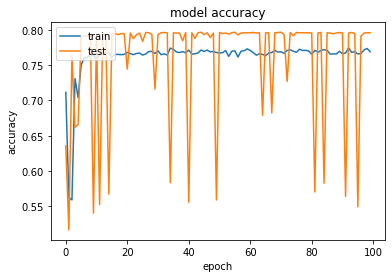

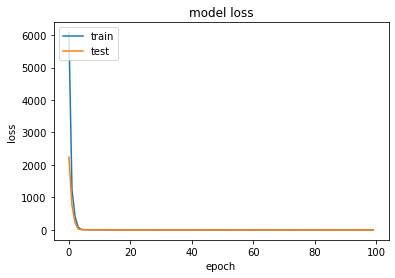

In [47]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
### Making Predictions and Evolutions of the model

In [51]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [53]:
###Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [54]:
cm

array([[1595,    0],
       [ 403,    2]])

In [55]:
### Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [56]:
score

0.7985